In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
#df_train = pd.read_csv('train_data.csv')

H:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Train = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
Test_val = pd.read_csv("test_data_hidden.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
Train=Train[['Store','Sales','Open','DayOfWeek']]
Test_val=Test_val[['Store','Sales','Open','DayOfWeek']]
print ('\n Parsed Data:')
Train.sort_values(['Date'],axis=0,inplace=True)
Test_val.sort_values(['Date'],axis=0,inplace=True)
print (Train.head())

H:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-6e52c1a51125>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')



 Parsed Data:
            Store  Sales  Open  DayOfWeek
Date                                     
2013-01-01   1115      0     0          2
2013-01-01    379      0     0          2
2013-01-01    378      0     0          2
2013-01-01    377      0     0          2
2013-01-01    376      0     0          2


In [3]:
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

<ipython-input-5-c4e053cc8d9a>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(store1['Sales'], model='additive',freq=365)


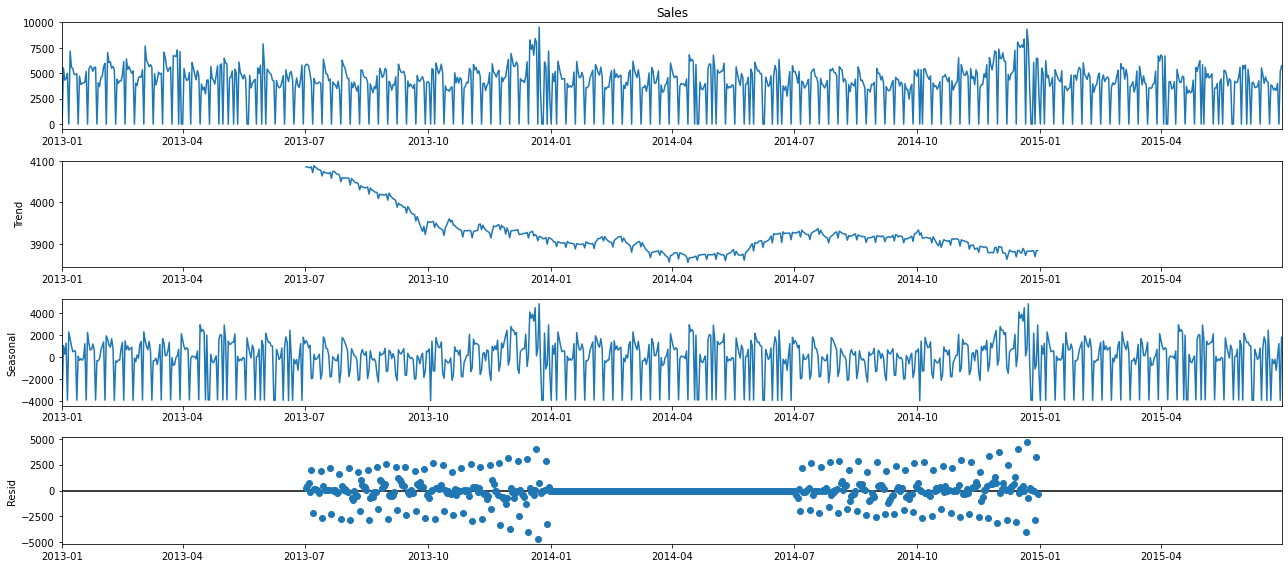

In [5]:
rcParams['figure.figsize'] = 18, 8
store1 = Train[Train['Store'] == 1]
decomposition = sm.tsa.seasonal_decompose(store1['Sales'], model='additive',freq=365)
fig = decomposition.plot()

In [6]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

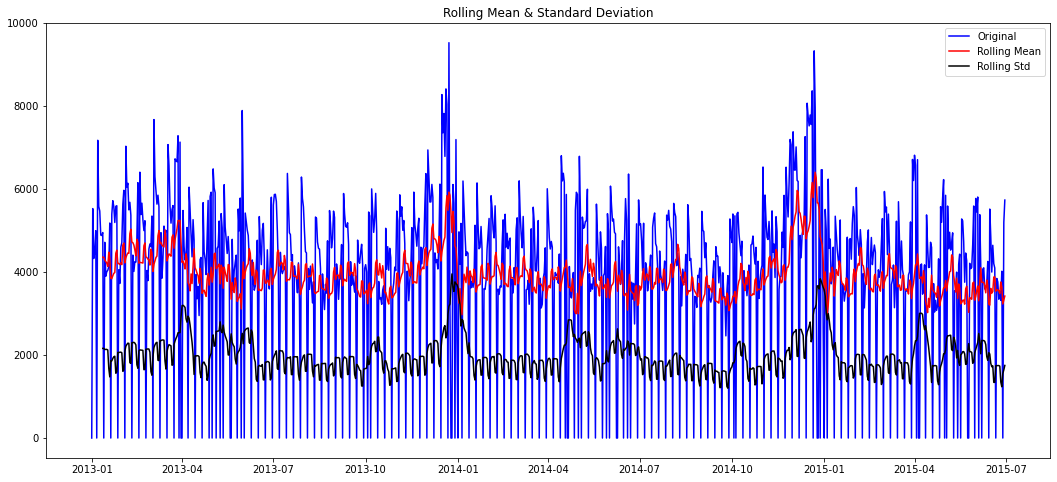

Results of Dickey-Fuller Test:
Test Statistic                  -4.236942
p-value                          0.000570
#Lags Used                      21.000000
Number of Observations Used    889.000000
Critical Value (1%)             -3.437727
Critical Value (5%)             -2.864797
Critical Value (10%)            -2.568504
dtype: float64


In [9]:
test_stationarity(store1['Sales'])

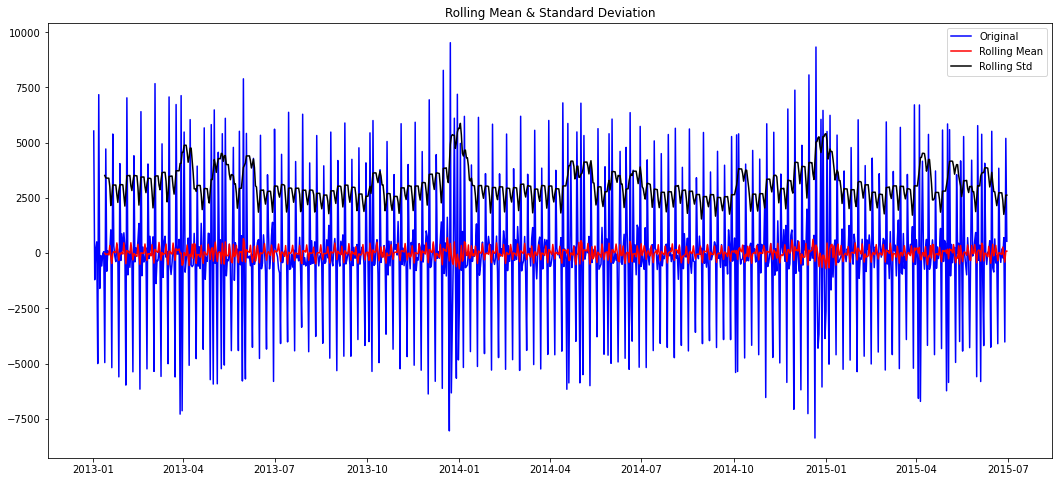

Results of Dickey-Fuller Test:
Test Statistic                -1.134395e+01
p-value                        1.038132e-20
#Lags Used                     2.000000e+01
Number of Observations Used    8.890000e+02
Critical Value (1%)           -3.437727e+00
Critical Value (5%)           -2.864797e+00
Critical Value (10%)          -2.568504e+00
dtype: float64


In [10]:
first_diff = store1['Sales'] - store1['Sales'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

In [14]:
#ARIMA model
arima_mod = ARIMA(store1.Sales, (9,1,9),freq='D')
res=arima_mod.fit(disp=False)
Y_pred = res.forecast(steps=31)[0]
print('MSE',np.sqrt(mean_squared_error(Y_pred,test_store1.Sales)))
print('MAE',mean_absolute_error(Y_pred,test_store1.Sales))
store1['pred']=Y_pred

H:\New folder\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
H:\New folder\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting h

NameError: name 'test_store1' is not defined